In [1]:
"""
Discrete random walk on a circle

Parameters
----------

p   :  Left-right bias parameter
x_0 :  Initial position on the circle
n   :  Range of points on the circle are 0, ..., n - 1
t   :  Number of steps
m   :  Number of times the random walk is performed to generate a probability distribution of final location
"""

p   = 0.5
x_0 = 1
n   = 7
t   = 200
m   = 10

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib inline
%matplotlib notebook

In [5]:
"""
Random walk on a circle with n points
"""
class RandomWalk:
    def __init__(self, p_step_left, x_0, n, t, samp_num):
        """Initialize parameters
        
        :param step_left_prob: probability of stepping left
        :param x_0: initial position the circle with values in 0, ..., n - 1
        :param n: number of points on the circle and the positions take 
                  values in 0, ..., n - 1
        :param t: timelike parameter that denotes number of steps
        :param sample_num: number of samples where random walk is performed
        """
        
        self.p_step_left = p_step_left
        self.x_0 = x_0
        self.n = n
        self.t = t
        self.samp_num = samp_num
        
        # Matrix of random walk samples...rows correspond to different 
        # samples while columns correspond to time steps
        self.random_walks = None
        
        # Position distribution matrix as a function of time steps...rows 
        # correspond to time steps while columns correspond to position 
        # on the circle
        self.position_dist = None
        
    def _next_position(self, x):
        """direction 0 - right, direction 1 - left """
        
        direction = np.random.binomial(1, self.p_step_left)
        if direction == 0:
            return (x + 1) % self.n
        else:
            return (x - 1) % self.n
        
    def _generate_random_walk(self):
        walk = [-1] * (self.t + 1)
        x = self.x_0
        for i in range(self.t + 1):
            walk[i] = x
            x = self._next_position(x)
        return walk
    
    def _generate_random_walk_samples(self):
        self.random_walks = [[]] * self.samp_num
        for i in range(self.samp_num):
            self.random_walks[i] = self._generate_random_walk()
                    
    def generate_position_distribution(self):
        if self.random_walks is None:
            self._generate_random_walk_samples()
            
        self.position_dist = \
            [[0 for i in range(self.n)] for j in range(self.t + 1)]
        
        for t_i in range(self.t + 1):
            for samp_j in range(self.samp_num):
                position = self.random_walks[samp_j][t_i]
                self.position_dist[t_i][position] += 1
                
        for t_i in range(self.t + 1):
            for pos_j in range(self.n):
                self.position_dist[t_i][pos_j] /= (1.0 * self.samp_num)
                
                
    def animate_position_distribution(self):
        fig = plt.figure()
        ax = plt.axes(xlim=(0, self.n), ylim=(0, 1.05))
        line, = ax.plot([], [], lw=2)
        
        def init():
            line.set_data([], [])
            return line,
        
        def animate(i):
            x = list(range(self.n))
            y = self.position_dist[i]
            line.set_data(x, y)
            return line,
        
        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=self.t + 1,
                                       interval=1000, blit=True)
        plt.show()

<IPython.core.display.Javascript object>


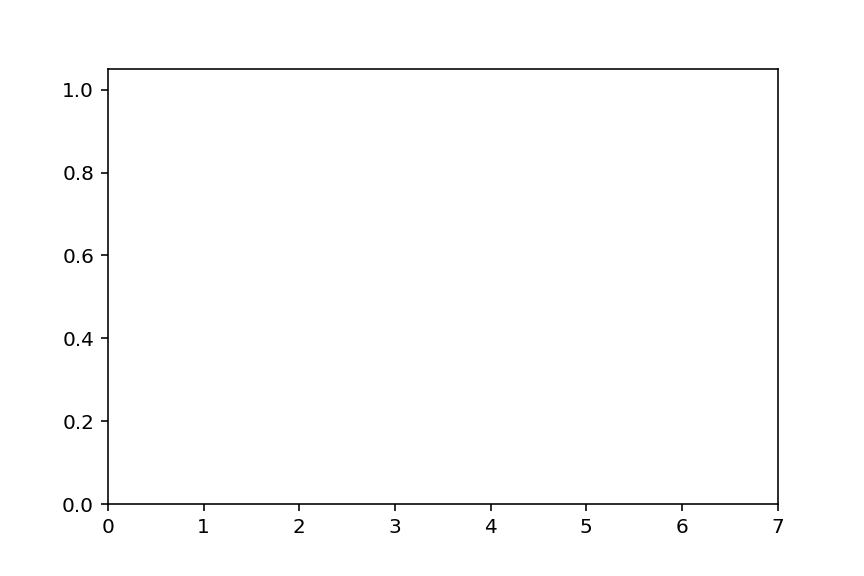

In [6]:
rw = RandomWalk(p, x_0, n, t, m)
rw.generate_position_distribution()
rw.animate_position_distribution()